<a href="https://colab.research.google.com/github/Bishal-Nengminja/Fake-News-Prediction/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**2. Load and Explore Data**

In [2]:
# Load dataset
news = pd.read_csv('fake_train.csv')
news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
news.isnull().mean() * 100

,0
id,0.000000
title,2.682692
author,9.408654
text,0.187500
label,0.000000


**3. Data Cleaning and Feature Engineering**

In [5]:
# Fill missing values
news = news.fillna("")

In [6]:
# Merge columns for content
news["content"] = news["author"] + " " + news["title"] + " " + news["text"]

In [7]:
# Feature: text length
news['text_length'] = news['content'].apply(len)

In [8]:
print(news["content"])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson What Keeps the F-35 Alive   Davi...
Name: content, Length: 20800, dtype: object


**4. Text Preprocessing (Lemmatization and Cleaning)**

In [9]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

news['clean_content'] = news['content'].apply(clean_text)


**5. Exploratory Data Analysis and Visualization**

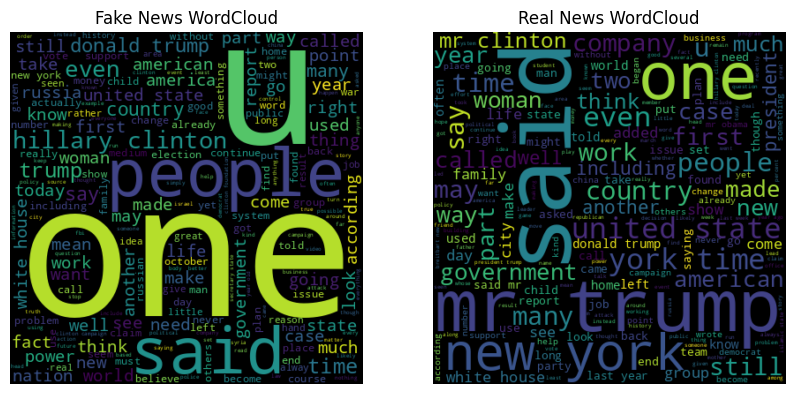

In [10]:
# WordCloud for Fake News
fake_text = " ".join(news[news.label == 1]['clean_content'])
real_text = " ".join(news[news.label == 0]['clean_content'])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Fake News WordCloud")
plt.imshow(WordCloud(width=400, height=400).generate(fake_text), interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Real News WordCloud")
plt.imshow(WordCloud(width=400, height=400).generate(real_text), interpolation='bilinear')
plt.axis('off')
plt.show()

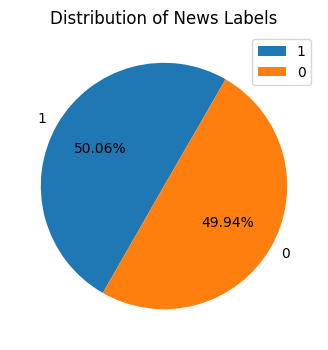

In [11]:
plt.figure(figsize=(5,4))
# Get the counts and labels for the pie chart from the 'label' column
x = news["label"].value_counts().index
y = news["label"].value_counts().values

plt.pie(y, labels=x, startangle= 60, autopct="%.2f%%")
plt.title("Distribution of News Labels")
plt.legend()
plt.show()

**6. Vectorization**

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
X = vectorizer.fit_transform(news['clean_content'])
y = news['label'].values

In [14]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5032607 stored elements and shape (20800, 10000)>
  Coords	Values
  (0, 4062)	0.10313223127038086
  (0, 2229)	0.10935409884808008
  (0, 219)	0.1465790142278064
  (0, 2944)	0.05773061489151638
  (0, 7874)	0.0541985250661462
  (0, 1613)	0.29185933018099625
  (0, 4914)	0.18237880419372737
  (0, 4537)	0.1774198984064235
  (0, 1326)	0.6286822183971587
  (0, 9276)	0.08987516335939048
  (0, 6018)	0.036833253469158424
  (0, 8570)	0.03173981746905379
  (0, 326)	0.012454910995468214
  (0, 9461)	0.06906681338971514
  (0, 4169)	0.021339500686604104
  (0, 1947)	0.06665544057984846
  (0, 5395)	0.020391821441831097
  (0, 656)	0.022292338555497643
  (0, 1976)	0.02946698933271671
  (0, 1642)	0.021153326753710035
  (0, 4938)	0.029204509137520072
  (0, 433)	0.03332772028992423
  (0, 4670)	0.036069000667432564
  (0, 2534)	0.023234215373968505
  (0, 9864)	0.10001906510502977
  :	:
  (20799, 5909)	0.032272100507103066
  (20799, 6240)	0.0336627169

**7. Train-Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**8. Model Training and Hyperparameter Tuning**\
Logistic Regression with Grid Search

In [16]:
lr = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Best Logistic Regression Params:", grid_lr.best_params_)

Best Logistic Regression Params: {'C': 10}


Random Forest

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**9. Evaluation**

In [18]:
# Logistic Regression
y_pred_lr = grid_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9673076923076923
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2077
           1       0.96      0.97      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [19]:
# Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2077
           1       0.96      0.98      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



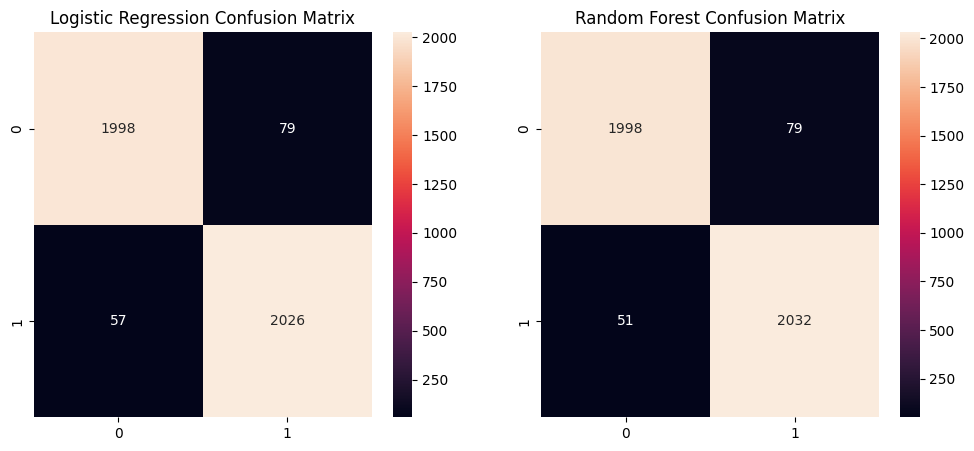

In [20]:
# Confusion Matrix
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

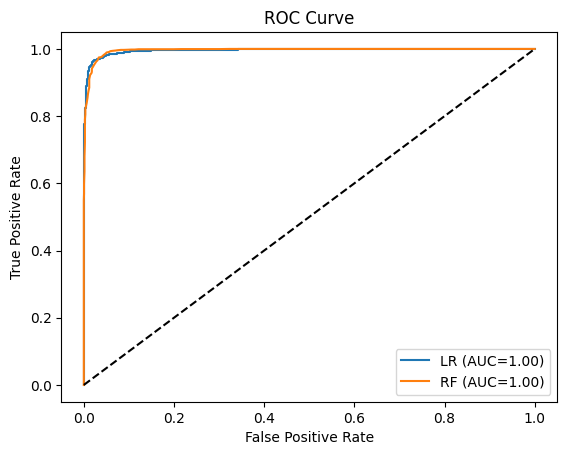

In [21]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, grid_lr.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_lr, tpr_lr, label=f'LR (AUC={auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={auc(fpr_rf, tpr_rf):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**10. Interactive Prediction Function**

In [24]:
def predict_news(text):
    clean = clean_text(text)
    vect = vectorizer.transform([clean])
    pred = rf.predict(vect)[0]
    prob = rf.predict_proba(vect)[0][pred]
    return f"Prediction: {'Fake' if pred==1 else 'Real'} (Confidence: {prob:.2f})"

# Example
print(predict_news("Donald Trump wins the 2020 election in a landslide"))

Prediction: Fake (Confidence: 1.00)
